In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pylab
%matplotlib inline

In [22]:
a =  np.loadtxt("point_w_conv2.txt", delimiter=',')
print(a.shape)

(4962,)


In [23]:
shape = [(192, 3, 5, 5),(160, 192, 1, 1),(96, 160, 1, 1),(192, 96, 5, 5),(192, 192, 1, 1),(192, 192, 1, 1),(192, 192, 3, 3),(192, 192, 1, 1),(10, 192, 1, 1)]
b = np.zeros(shape[1])
size0 = b.shape[0]
size1 = b.shape[1]
size2 = b.shape[2]
size3 = b.shape[3]
for t in range(len(a)/2):
    i = a[t*2]
    b[int(i/size1/size2/size3)][int(i/size2/size3%size1)][int(i/size3%size2)][int(i%size3)] = a[t*2+1]

In [25]:
c = b.swapaxes(1,3)
c[c==0] = 86.28
c = 86.28 - c
c = (c>0.7) * 1.0
TheMap = np.zeros([size2,size3])
for i in range(size0):
    for j in range(size2):
        for k in range(size3):
            for l in range(size1):
                TheMap[j][k] += c[i][j][k][l]
print TheMap

[[160.]]


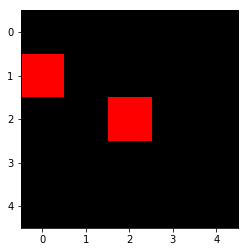

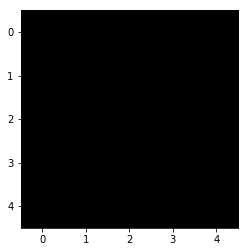

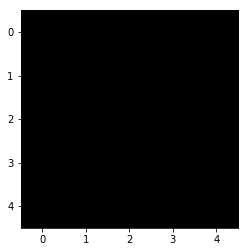

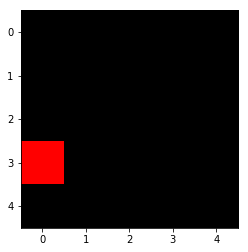

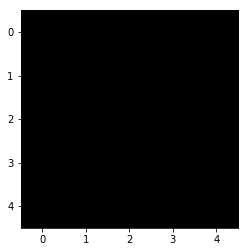

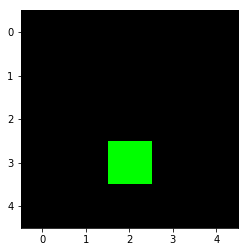

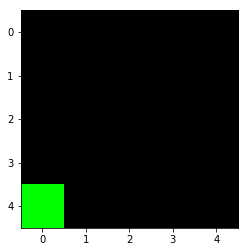

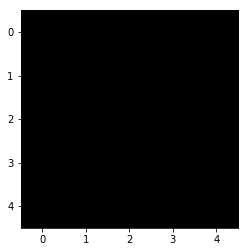

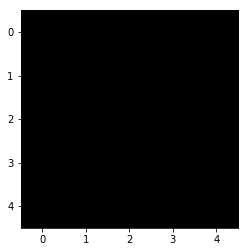

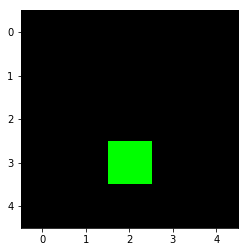

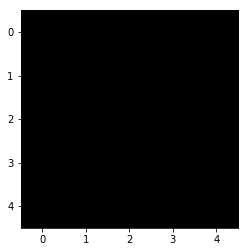

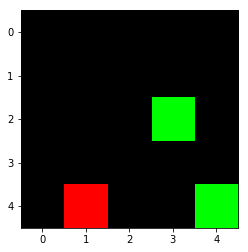

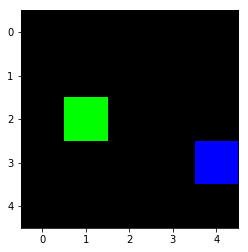

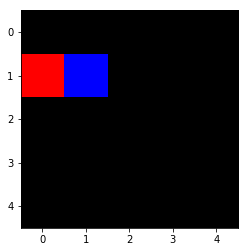

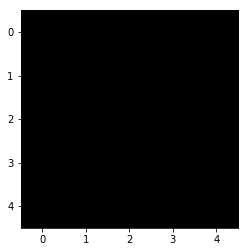

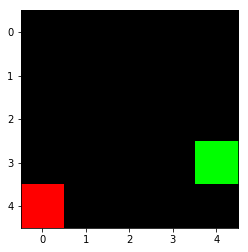

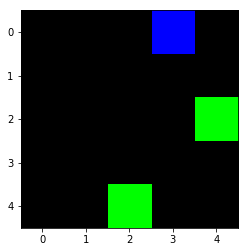

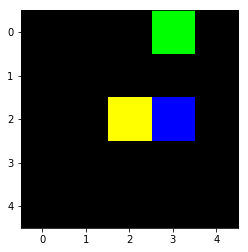

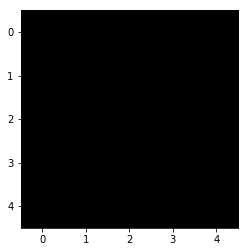

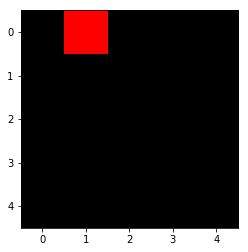

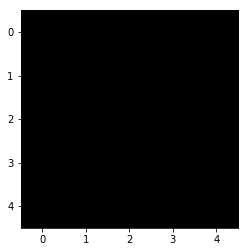

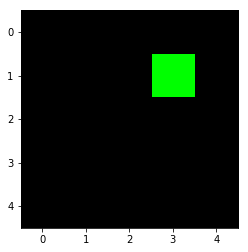

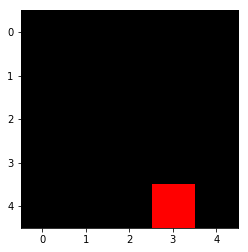

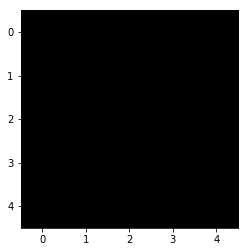

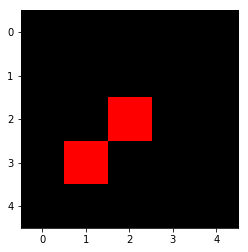

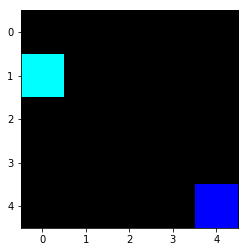

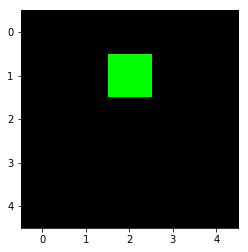

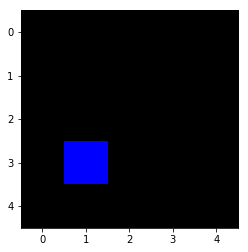

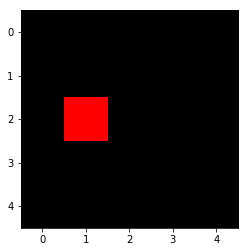

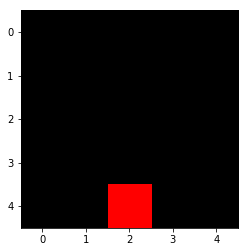

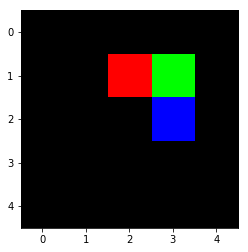

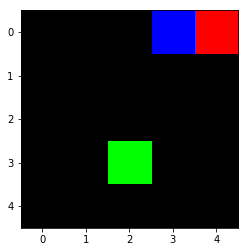

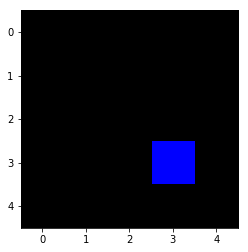

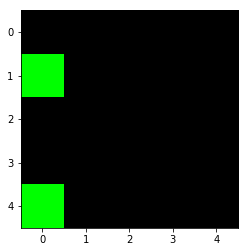

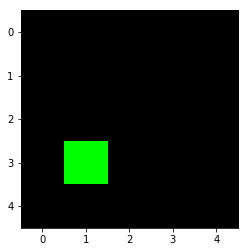

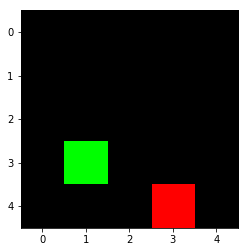

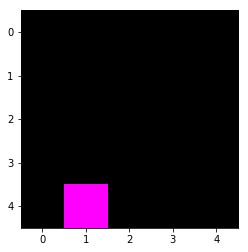

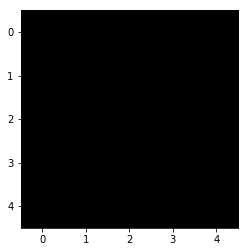

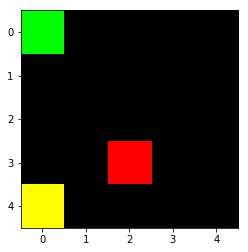

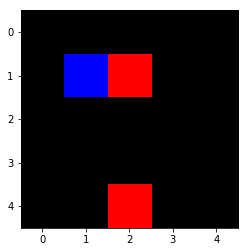

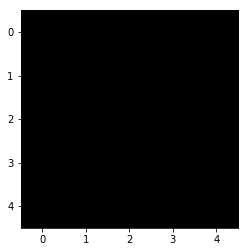

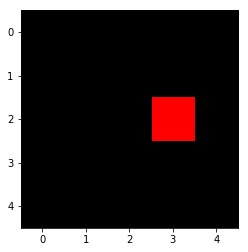

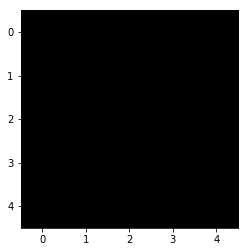

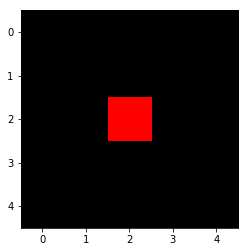

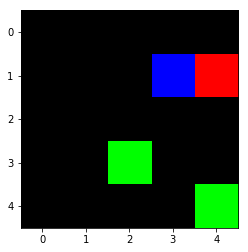

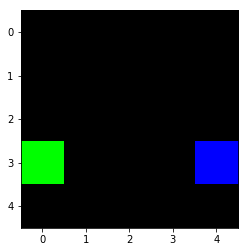

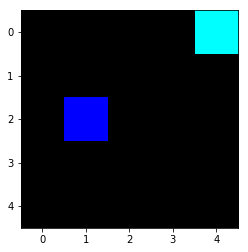

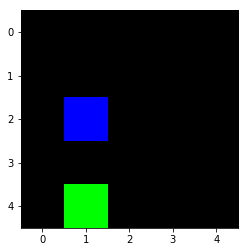

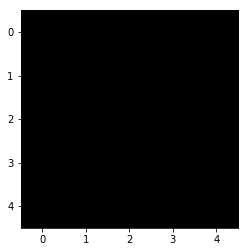

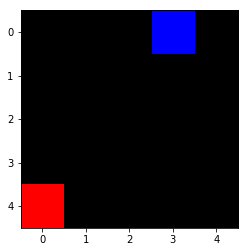

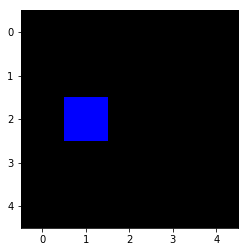

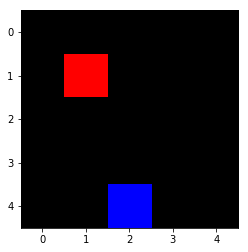

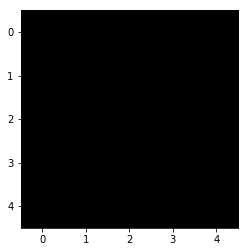

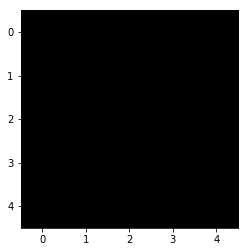

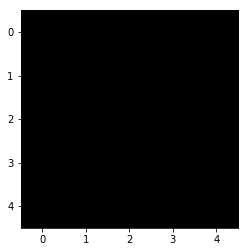

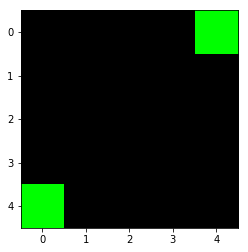

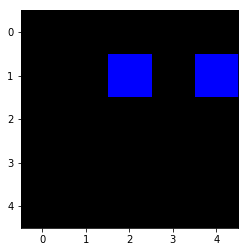

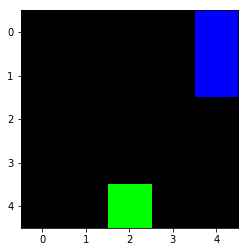

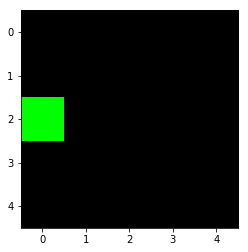

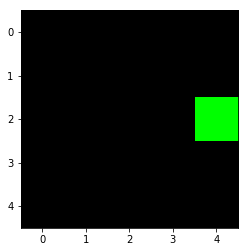

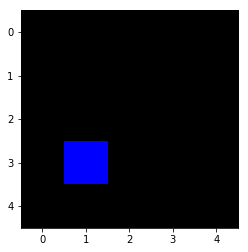

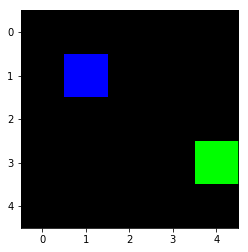

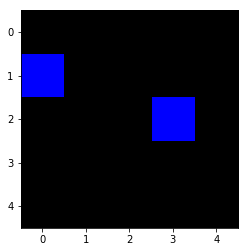

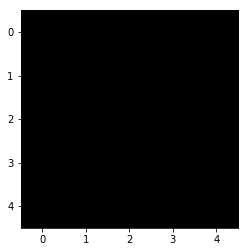

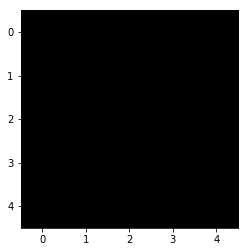

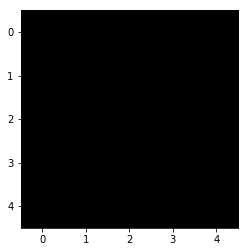

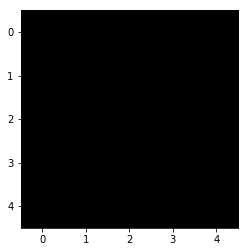

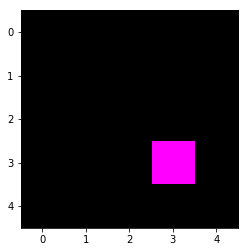

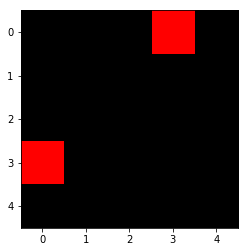

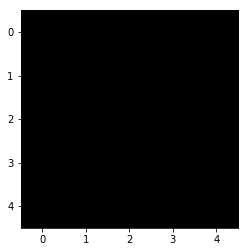

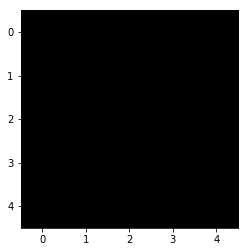

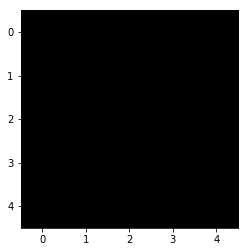

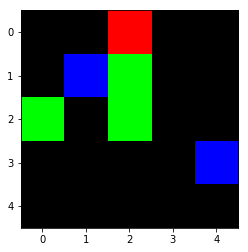

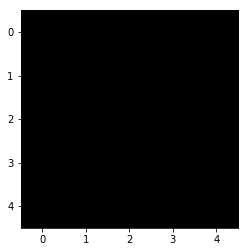

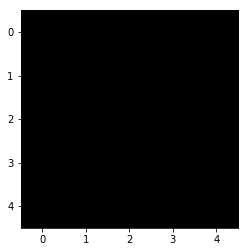

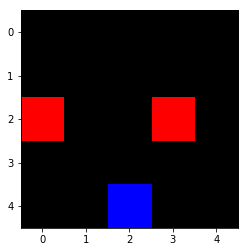

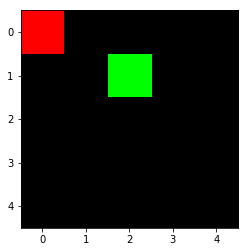

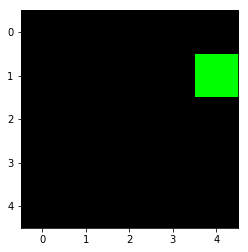

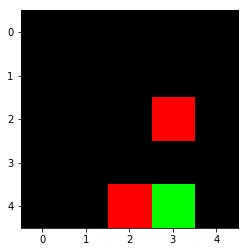

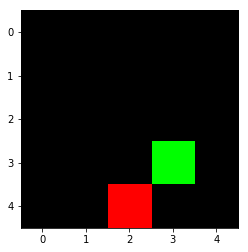

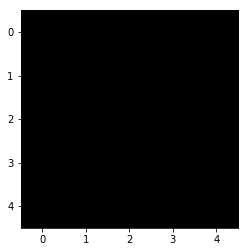

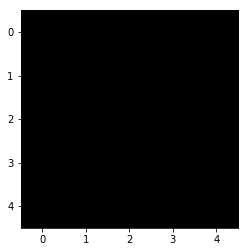

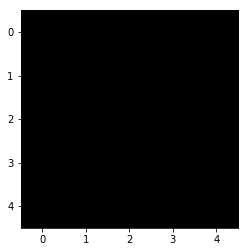

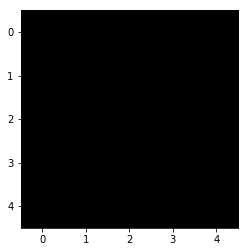

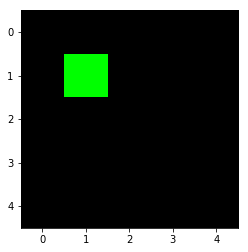

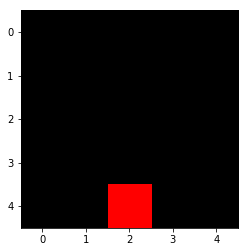

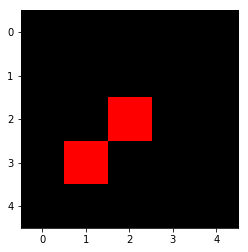

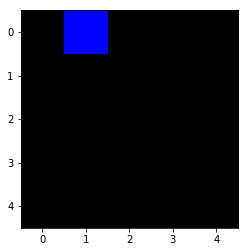

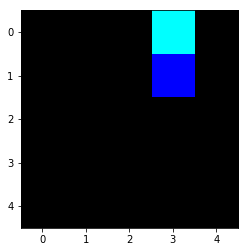

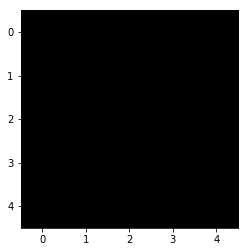

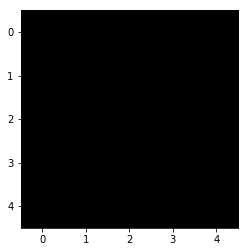

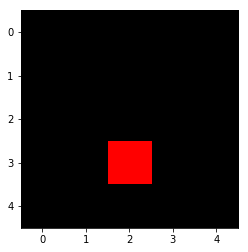

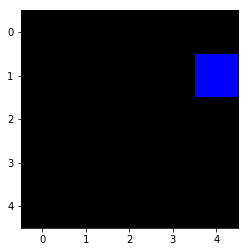

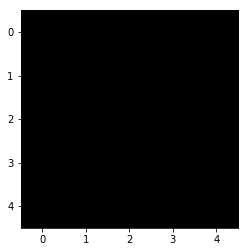

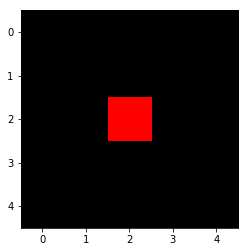

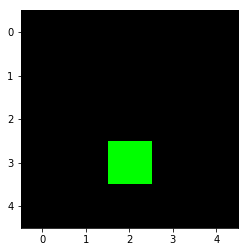

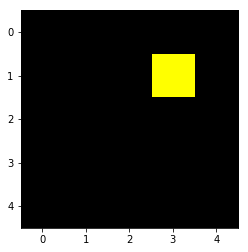

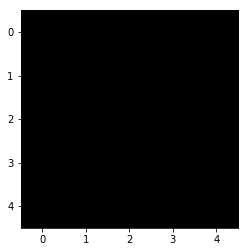

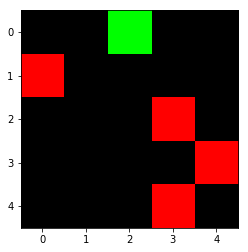

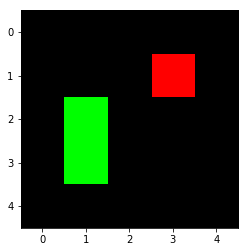

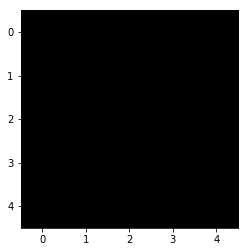

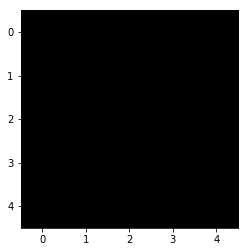

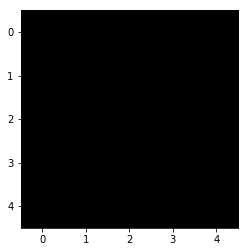

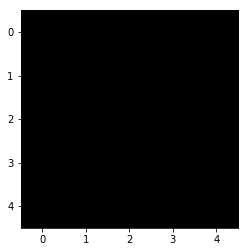

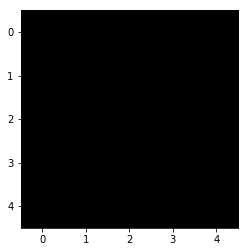

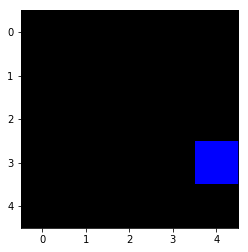

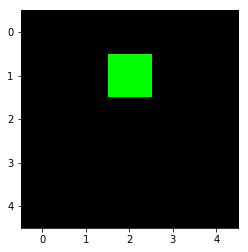

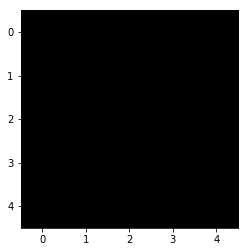

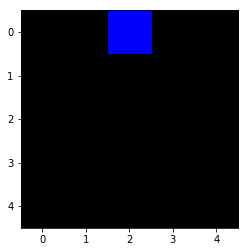

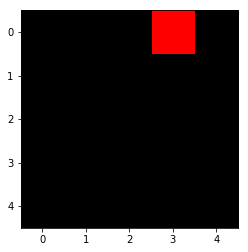

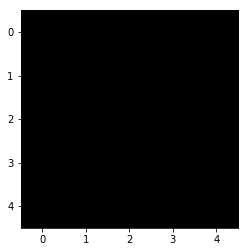

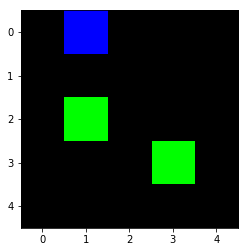

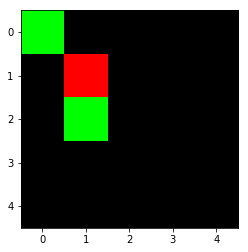

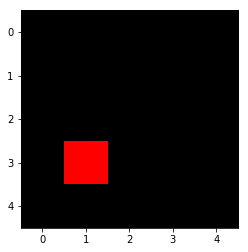

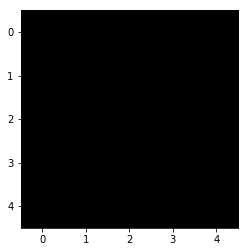

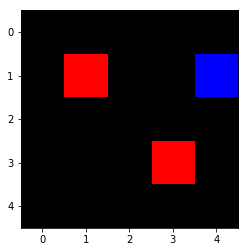

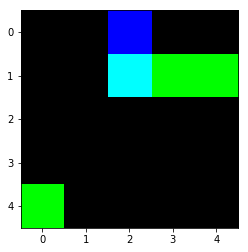

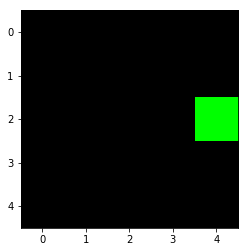

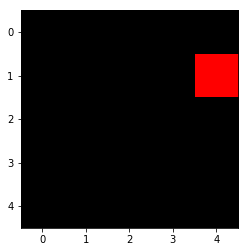

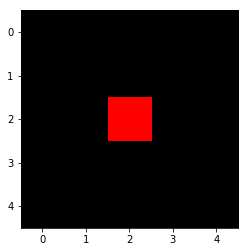

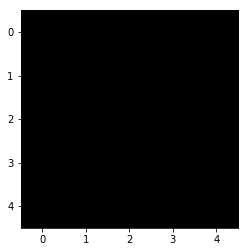

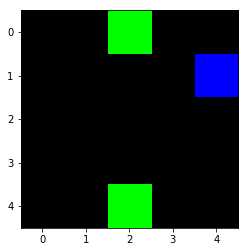

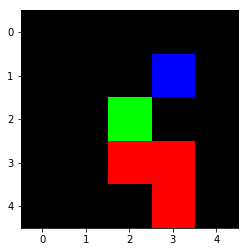

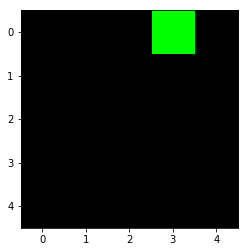

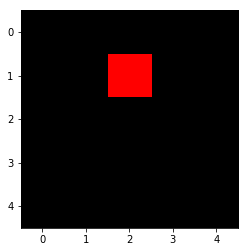

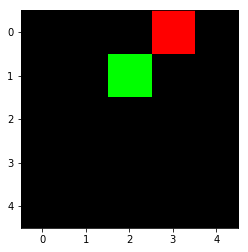

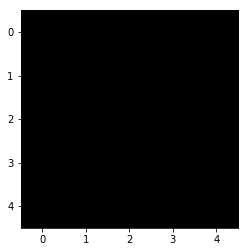

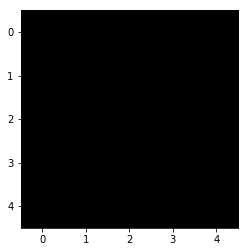

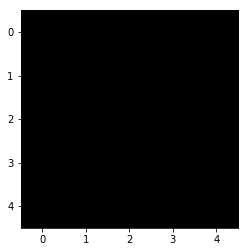

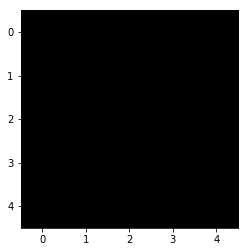

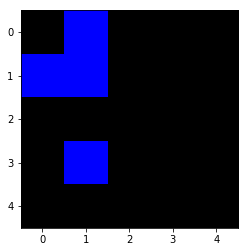

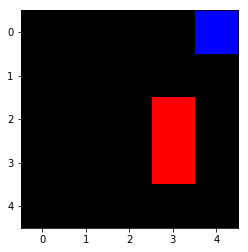

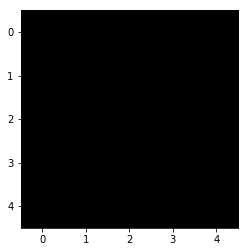

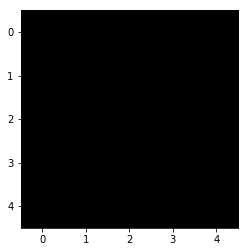

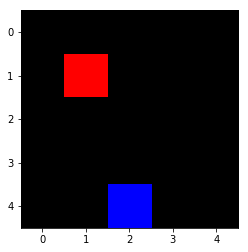

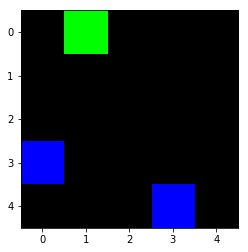

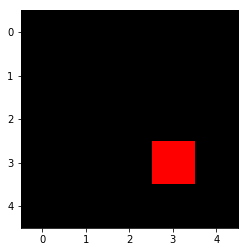

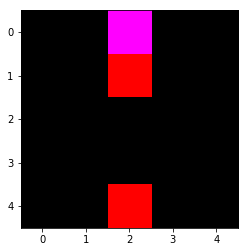

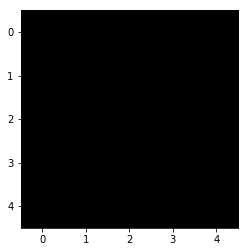

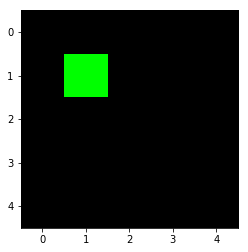

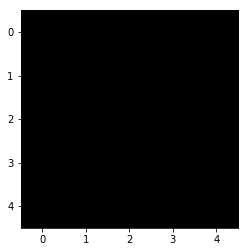

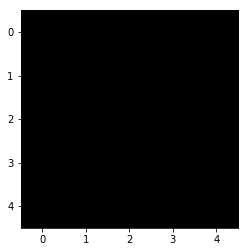

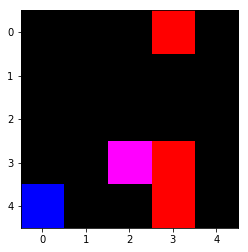

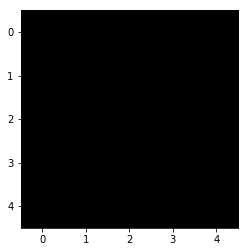

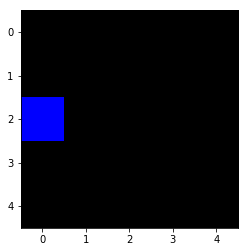

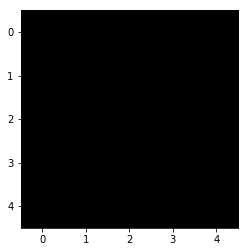

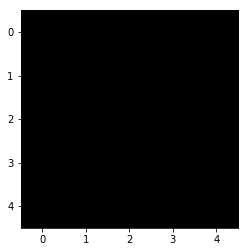

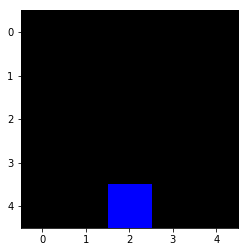

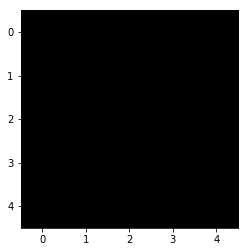

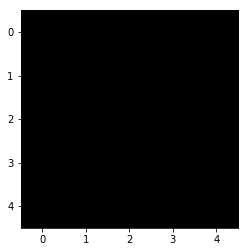

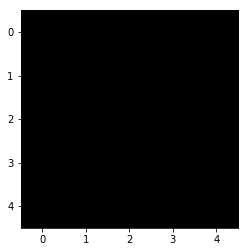

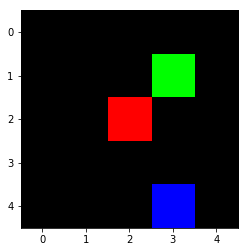

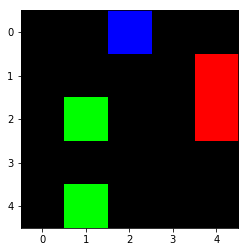

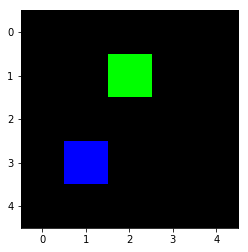

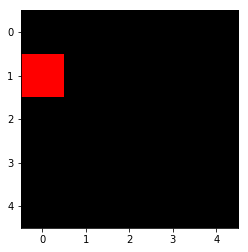

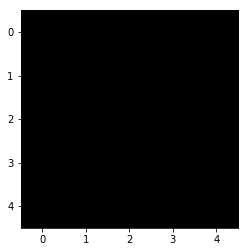

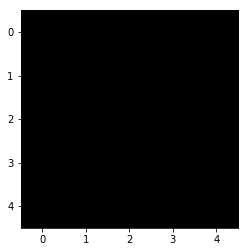

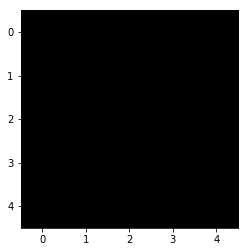

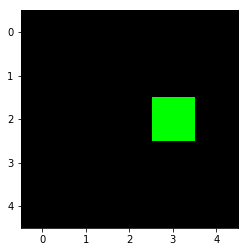

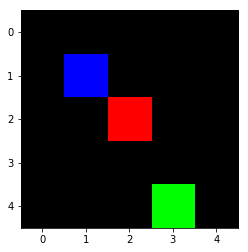

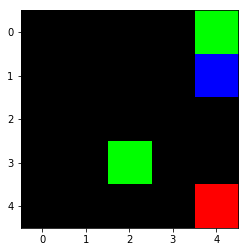

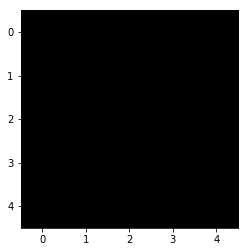

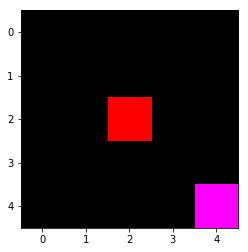

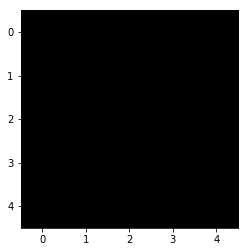

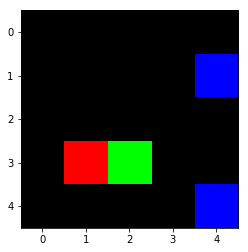

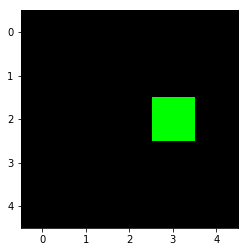

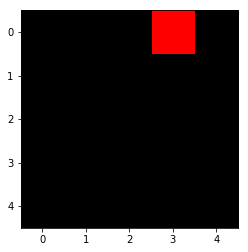

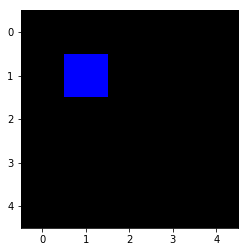

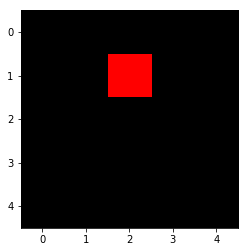

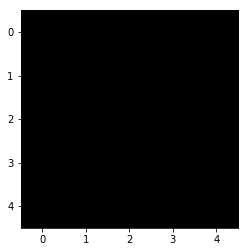

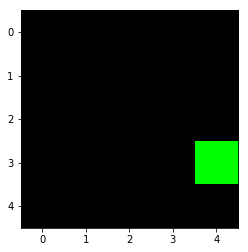

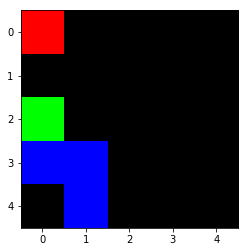

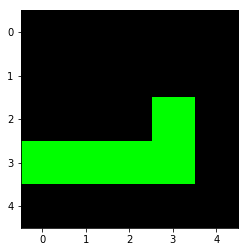

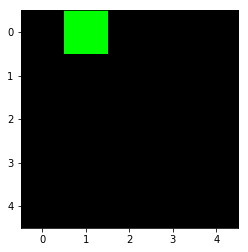

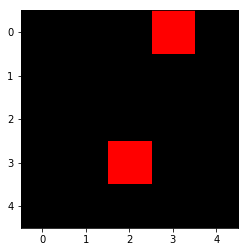

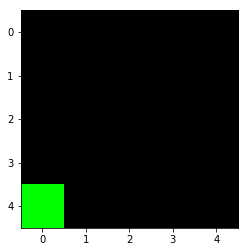

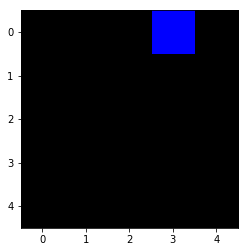

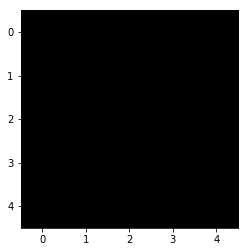

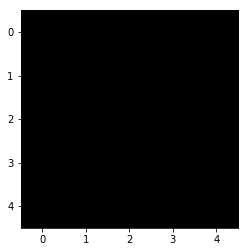

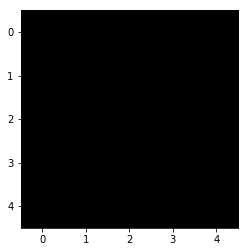

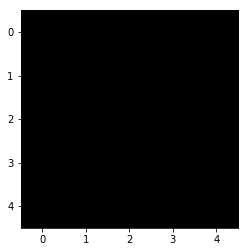

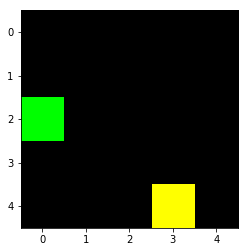

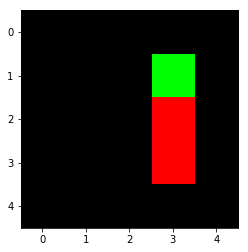

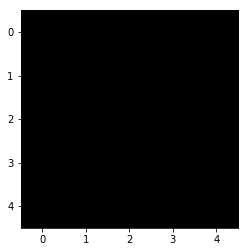

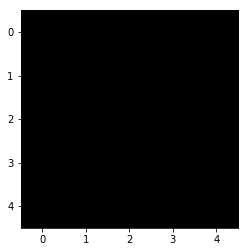

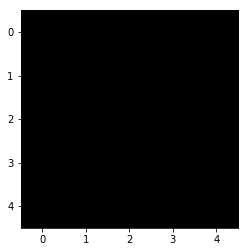

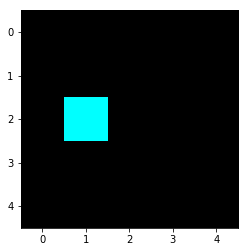

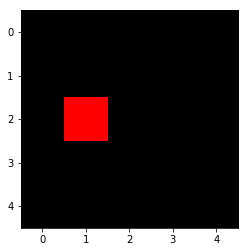

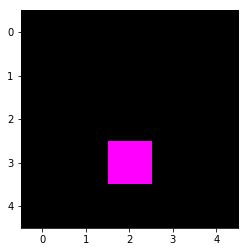

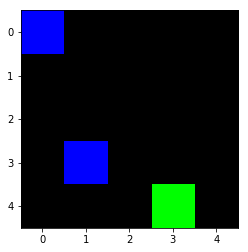

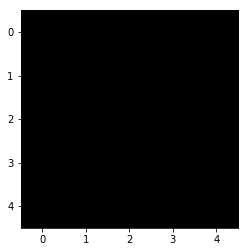

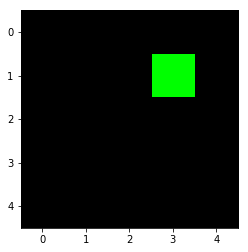

In [36]:
for i in range(192):
    plt.imshow(c[i])
    pylab.show()